In [ ]:
!pip install pysentimiento

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 12.4 MB/s 
     |████████████████████████████████| 3.3 MB 43.4 MB/s 
     |████████████████████████████████| 175 kB 53.3 MB/s 
     |████████████████████████████████| 101 kB 11.5 MB/s 
     |████████████████████████████████| 3.3 MB 39.8 MB/s 
     |████████████████████████████████| 880 kB 50.1 MB/s 
     |████████████████████████████████| 596 kB 48.8 MB/s 
     |████████████████████████████████| 1.1 MB 40.7 MB/s 
     |████████████████████████████████| 140 kB 40.2 MB/s 
     |████████████████████████████████| 212 kB 42.4 MB/s 
     |████████████████████████████████| 127 kB 42.0 MB/s 
     |████████████████████████████████| 144 kB 35.3 MB/s 
     |████████████████████████████████| 94 kB 1.8 MB/s 
     |████████████████████████████████| 271 kB 36.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=a85f7b9

In [ ]:
import json
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def json_to_list(json_file):
  with open(json_file) as f:
    data = json.load(f)
  documents =  []
  print(data[0])
  for tweet in data:
    date, time = tweet["time"].split("T")
    year, month, day = date.split("-")
    try:
      time = time.split(".")[0]
      hour, min, sec = time.split(":")
    except:
      time = time.split("+")[0]
      hor, min, sec = time.split(":")
    date = datetime.datetime(int(year), int(month), int(day), int(hour), int(min))
    documents.append((date, tweet["body"], tweet["relevance"]))
  return sorted(documents)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

FIGUERES_PATH = '/content/drive/My Drive/Naveler/03.TECH/Anàlisis de sentiment/Dumps marques/query_555_2021-06-30_2022-06-30.json'
CHAVES_PATH = '/content/drive/My Drive/Naveler/03.TECH/Anàlisis de sentiment/Dumps marques/query_609_2021-06-30_2022-06-30.json'

figueres_documents = json_to_list(FIGUERES_PATH)
chaves_documents = json_to_list(CHAVES_PATH)

Mounted at /content/drive
{'source': 'twitter', 'source_group': 'social', 'tagged_users': ['silhersa', 'laura_ch', 'figuerescr', 'oariascr', 'traficoni'], 'relevance': 3.3094905174013527, 'time': '2021-09-26T16:04:00.110000+00:00', 'hour': 16, 'id': '1442158063650287618', 'source_device': 'Twitter for Android', 'url': 'https://twitter.com/1279208441169555456/status/1442158063650287618', 'user_id': '1279208441169555456', 'profile_image_url': 'http://pbs.twimg.com/profile_images/1279232468244140036/H_Fi4slz_normal.jpg', 'profile_url': 'https://twitter.com/somosderechanic', 'name': 'Somos DNNU 🇳🇮', 'friends_count_num': 658, 'followers_count_num': 876, 'location': 'Nicaragua', 'description': 'Comprometidos con el cambio de Nicaragua, sin Sandinismo! sin Orteguismo! sin falsa oposición. Un cambio para Nicaragua 🇳🇮 #SomosDNNU', 'user_lang': None, 'verified': False, 'type': 'user', 'gender': 'unknown', 'share_action_count': 15, 'like_action_count': 30, 'reply_action_count': 0, 'reach': 5874.0

In [ ]:
print(f'Figueres: {len(figueres_documents)}')
print(f'Chaves: {len(chaves_documents)}')

Figueres: 67331
Chaves: 105623


In [ ]:
from pysentimiento import create_analyzer
sentiment_analyzer = create_analyzer(task="sentiment", lang="es")

Downloading:   0%|          | 0.00/925 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/415M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/334 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/838k [00:00<?, ?B/s]

In [ ]:
delta_t = 7

Figueres

In [ ]:
figueres_dates = []
figueres_tweets = []
figueres_relevance = []
for date, tweet, relevance in figueres_documents:
  figueres_dates.append(date)
  figueres_tweets.append(tweet)
  figueres_relevance.append(relevance)

In [ ]:
figueres_prob_pos = []
figueres_prob_neu = []
figueres_prob_neg = []
outputs = sentiment_analyzer.predict(figueres_tweets)
for output in outputs:
  figueres_prob_pos.append(output.probas["POS"])
  figueres_prob_neu.append(output.probas["NEU"])
  figueres_prob_neg.append(output.probas["NEG"])

Parameter 'function'=<function BaseAnalyzer._tokenize at 0x7fe812d2c950> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/2105 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 67331
  Batch size = 32


In [ ]:
figueres_scores = list(np.array(figueres_prob_pos) + 0.5*np.array(figueres_prob_neu)) #score = 1*prob_pos + 0.5*prob_neu + 0*prob_neg
figueres_ponderated_scores = list(np.array(figueres_scores) + np.array(figueres_relevance)*np.array(figueres_scores)) #ponderated_score = score*(1+relevance)

In [ ]:
figueres_reduced_dates = []
figueres_reduced_scores = []
figueres_reduced_ponderated_scores = []
figueres_volumes = []
year0 = figueres_dates[0].year
month0 = figueres_dates[0].month
day0 = figueres_dates[0].day
date0 = datetime.datetime(year0, month0, day0)
score_ = 0
ponderated_score_ = 0
count_ = 0
for i, date in enumerate(figueres_dates):
  dif = date - date0
  if dif.days < delta_t:
    score_ += figueres_scores[i]
    ponderated_score_ += figueres_ponderated_scores[i]
    count_ += 1
  else:
    #add values
    figueres_reduced_dates.append(date0)
    figueres_reduced_scores.append(score_/count_)
    figueres_reduced_ponderated_scores.append(ponderated_score_/count_)
    figueres_volumes.append(count_)
    #reset parameters
    date0 = datetime.datetime(date.year, date.month, date.day)
    score_ = figueres_scores[i]
    ponderated_score_ = figueres_ponderated_scores[i]
    count_ = 1
#final addition
figueres_reduced_dates.append(date0)
figueres_reduced_scores.append(score_/count_)
figueres_reduced_ponderated_scores.append(ponderated_score_/count_)
figueres_volumes.append(count_)

Chaves

In [ ]:
chaves_dates = []
chaves_tweets = []
chaves_relevance = []
for date, tweet, relevance in chaves_documents:
  chaves_dates.append(date)
  chaves_tweets.append(tweet)
  chaves_relevance.append(relevance)

In [ ]:
chaves_prob_pos = []
chaves_prob_neu = []
chaves_prob_neg = []
outputs = sentiment_analyzer.predict(chaves_tweets)
for output in outputs:
  chaves_prob_pos.append(output.probas["POS"])
  chaves_prob_neu.append(output.probas["NEU"])
  chaves_prob_neg.append(output.probas["NEG"])

  0%|          | 0/3301 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 105623
  Batch size = 32


In [ ]:
chaves_scores = list(np.array(chaves_prob_pos) + 0.5*np.array(chaves_prob_neu)) #score = 1*prob_pos + 0.5*prob_neu + 0*prob_neg
chaves_ponderated_scores = list(np.array(chaves_scores) + np.array(chaves_relevance)*np.array(chaves_scores)) #ponderated_score = score*(1+relevance)

In [ ]:
chaves_reduced_dates = []
chaves_reduced_scores = []
chaves_reduced_ponderated_scores = []
chaves_volumes = []
year0 = chaves_dates[0].year
month0 = chaves_dates[0].month
day0 = chaves_dates[0].day
date0 = datetime.datetime(year0, month0, day0)
score_ = 0
ponderated_score_ = 0
count_ = 0
for i, date in enumerate(chaves_dates):
  dif = date - date0
  if dif.days < delta_t:
    score_ += chaves_scores[i]
    ponderated_score_ += chaves_ponderated_scores[i]
    count_ += 1
  else:
    #add values
    chaves_reduced_dates.append(date0)
    chaves_reduced_scores.append(score_/count_)
    chaves_reduced_ponderated_scores.append(ponderated_score_/count_)
    chaves_volumes.append(count_)
    #reset parameters
    date0 = datetime.datetime(date.year, date.month, date.day)
    score_ = chaves_scores[i]
    ponderated_score_ = chaves_ponderated_scores[i]
    count_ = 1
#final addition
chaves_reduced_dates.append(date0)
chaves_reduced_scores.append(score_/count_)
chaves_reduced_ponderated_scores.append(ponderated_score_/count_)
chaves_volumes.append(count_)

Comparison

In [ ]:
def filter(dates, y_parameter, start_date, end_date):
  filtered_dates = []
  filtered_y = []
  for i, date in enumerate(dates):
    if date >= start_date and date <= end_date:
      filtered_dates.append(date)
      filtered_y.append(y_parameter[i])
  return filtered_dates, filtered_y

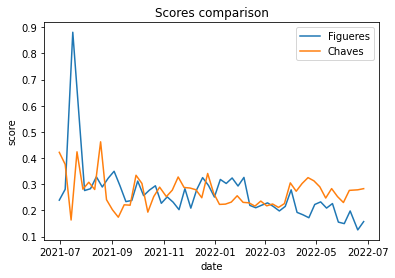

In [ ]:
plt.plot(figueres_reduced_dates, figueres_reduced_scores, chaves_reduced_dates, chaves_reduced_scores)
plt.title("Scores comparison")
plt.xlabel("date")
plt.ylabel("score")
plt.legend(["Figueres", "Chaves"])
plt.show()

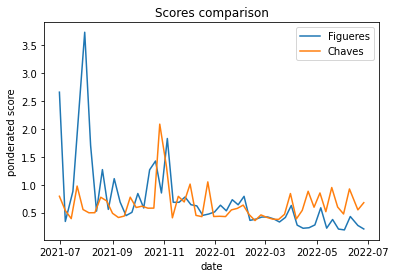

In [ ]:
plt.plot(figueres_reduced_dates, figueres_reduced_ponderated_scores, chaves_reduced_dates, chaves_reduced_ponderated_scores)
plt.title("Ponderated scores comparison")
plt.xlabel("date")
plt.ylabel("ponderated score")
plt.legend(["Figueres", "Chaves"])
plt.show()

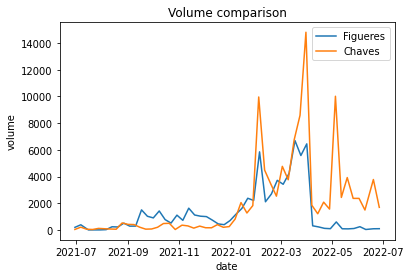

In [ ]:
plt.plot(figueres_reduced_dates, figueres_volumes, chaves_reduced_dates, chaves_volumes)
plt.title("Volume comparison")
plt.xlabel("date")
plt.ylabel("volume")
plt.legend(["Figueres", "Chaves"])
plt.show()

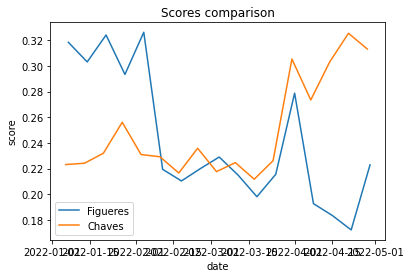

In [ ]:
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2022, 5, 1)
figueres_filtered_dates, figueres_filtered_scores = filter(figueres_reduced_dates, figueres_reduced_scores, start_date, end_date)
chaves_filtered_dates, chaves_filtered_scores = filter(chaves_reduced_dates, chaves_reduced_scores, start_date, end_date)
plt.plot(figueres_filtered_dates, figueres_filtered_scores, chaves_filtered_dates, chaves_filtered_scores)
plt.title("Scores comparison")
plt.xlabel("date")
plt.ylabel("score")
plt.legend(["Figueres", "Chaves"])
plt.show()

1st round: 6/02/2022

2nd round: 3/04/2022

Since mids of March, Chaves receives more positive comments than Figueres. This could be related with the fact that Figueres had more votes in the first round, but Chaves won in the second one.

Since ends of January/beginnings of February, Chaves has a higher volum of mentions than Figueres. There are three important peaks in Chaves' volume, the first one takes place in the first round and the second one in the second round. This makes sense because Chaves results were surprising in both rounds.